# Recognition tables with text
variant 4

In [1]:
name_jpg = 'doc00030020210414100706_001.jpg'

In [2]:
%matplotlib inline
import pytesseract
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
import copy

In [3]:
def show_image (img):
    plt.figure(figsize=(20,20))
    plt.imshow(img)
    plt.show()

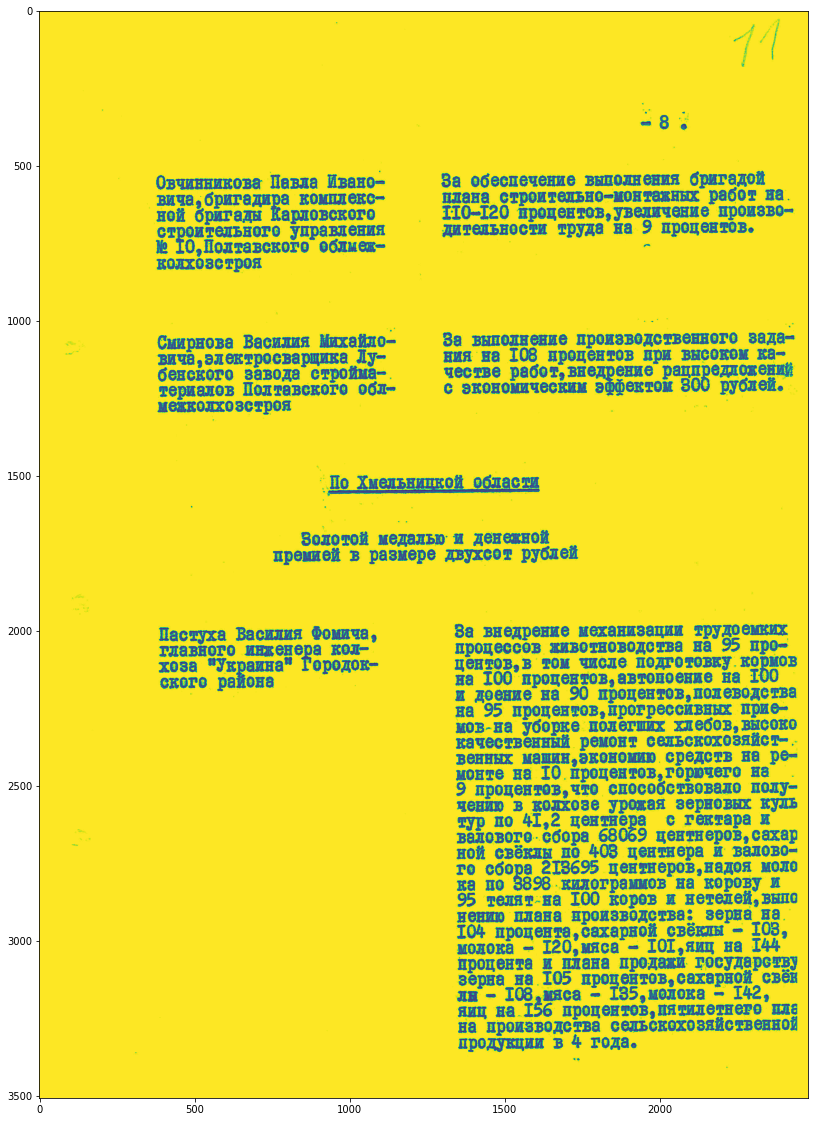

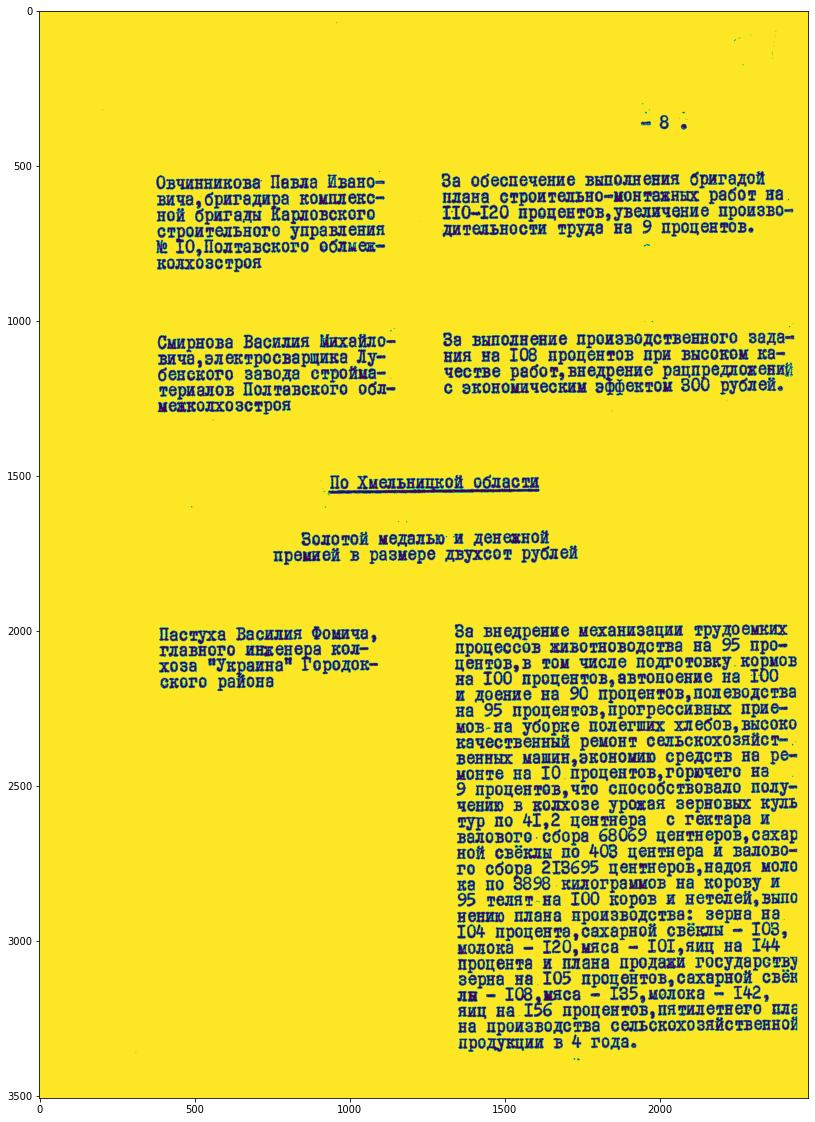

In [4]:
gray = cv2.imread(name_jpg, 0)
show_image(gray)
#gray = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY)
ret, threshold_gray = cv2.threshold(gray, 120, 255, 0)
show_image(threshold_gray)

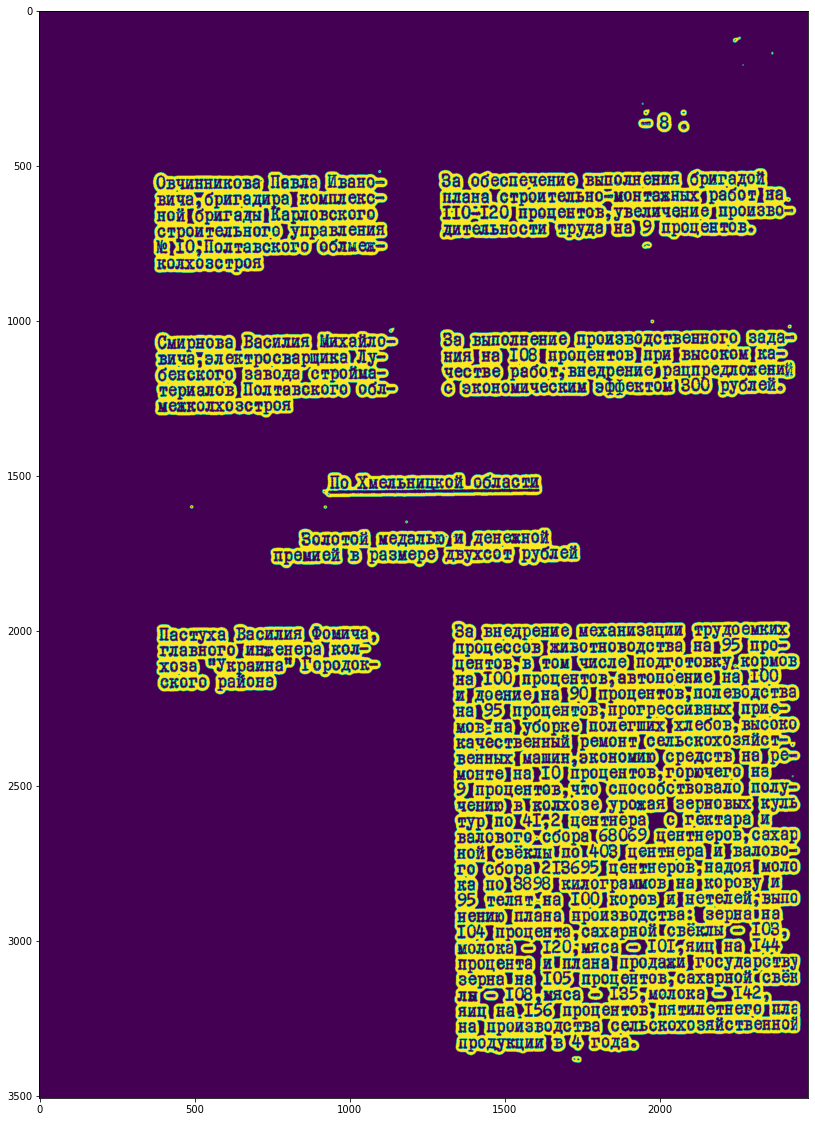

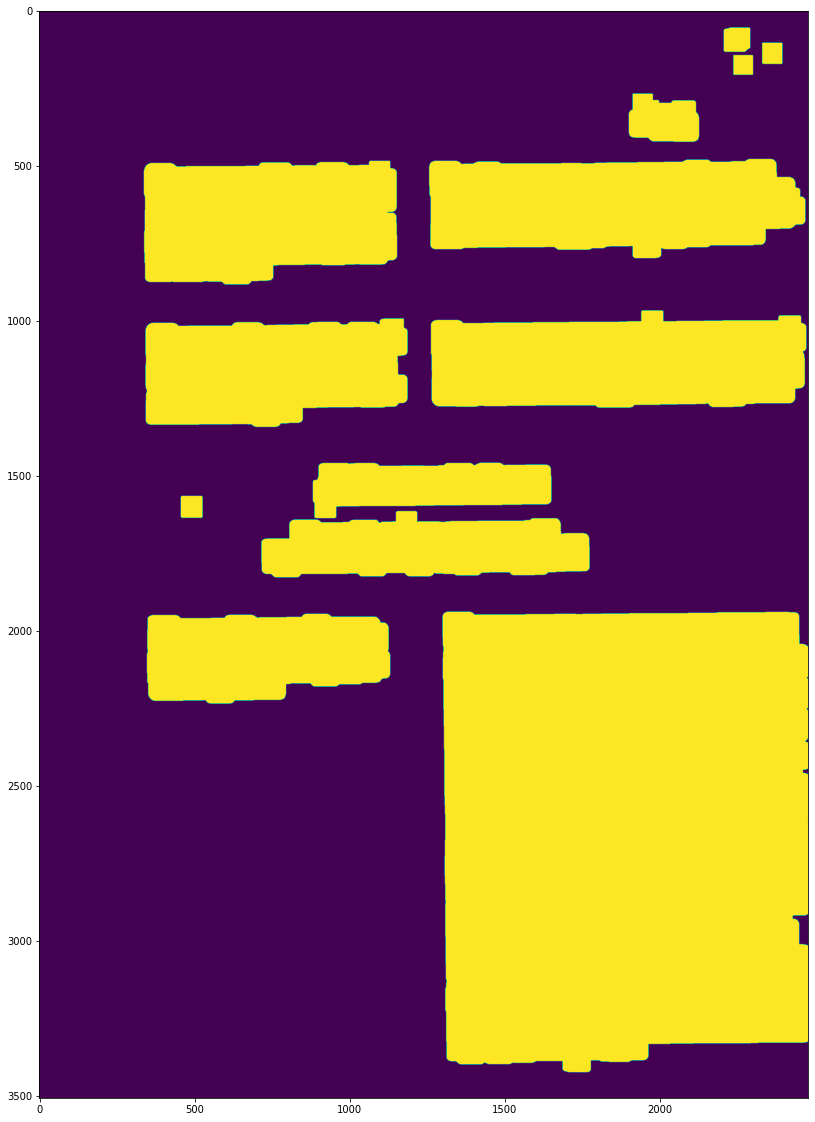

In [5]:
binary = cv2.adaptiveThreshold(threshold_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 35, -5)
# Show pictures 
show_image(binary)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(11,11))
dilation = cv2.dilate(binary,kernel,iterations = 6)
show_image(dilation)

[[348, 1946, 785, 290], [1301, 1939, 1179, 1485], [717, 1615, 1059, 214], [883, 1459, 770, 179], [343, 994, 846, 350], [1264, 968, 1211, 314], [338, 486, 817, 399], [1258, 480, 1214, 320], [1902, 269, 227, 156]]
9


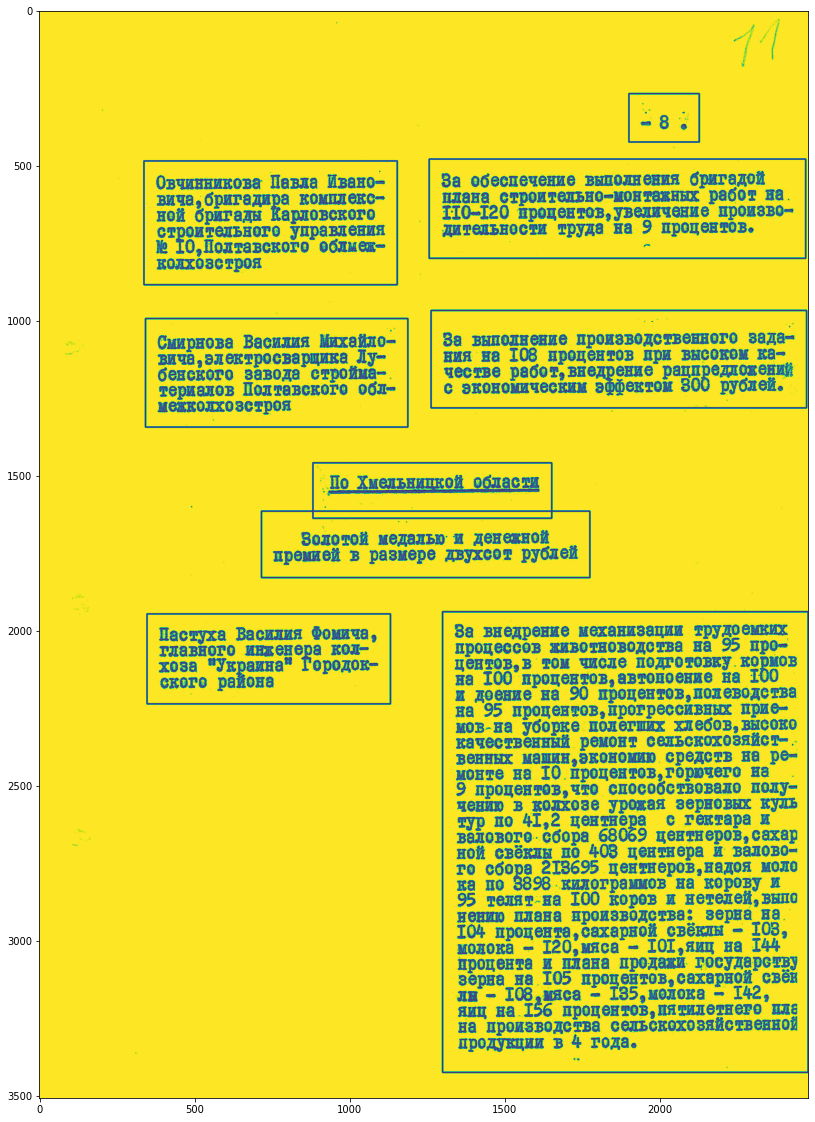

In [6]:
# Find contours, highlight text areas, and extract ROIs
cnts = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
ddd = gray.copy()
ROI_number = 0
list_contur_num = []
list_contur_coord = []
k = -1
for c in cnts:
    area = cv2.contourArea(c)
    k += 1 
    if area > 10000:
        list_contur_num.append(k)
        x,y,w,h = cv2.boundingRect(c)
        list_contur_coord.append([x,y,w,h])
        cv2.rectangle(ddd, (x, y), (x + w, y + h), (36,255,12), 3)
        # ROI = image[y:y+h, x:x+w]
        # cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI)
        # ROI_number += 1
print(list_contur_coord)
print(len(list_contur_coord))
show_image(ddd)

In [7]:
def def_text(out, file_text, file_fragment_text):
    d = pytesseract.image_to_data(out, output_type=pytesseract.Output.DICT, lang="rus")
    n_boxes = len(d['level'])
    print(n_boxes)
    text = ' '.join([kk for kk in d['text'] if len(kk.strip()) > 0])
    text = text.replace('\n',' ').replace('- ','')
    print(text)
    if len(text.strip())>0:
        file_text.write(text.strip() + '\n')
    img_rez = out.copy()
    #file_mistakes = open('file_mistakes2.txt','a')
    for i in range(n_boxes):
        (t, x, y, w, h) = (d['text'][i],d['left'][i], d['top'][i], d['width'][i], d['height'][i])    
        img_rez = cv2.rectangle(img_rez, (x, y), (x + w, y + h), (0, 255, 0), 1)
        t = t.strip().replace('|','').replace('.','').replace('--','').replace('—-','').replace('”','')
        if len(t)>0 and len(t)< 15:# and not t.isdigit():
            print(t, x, y, w, h, sep=' | ')
            file_fragment_text.write('|'.join([t, str(x), str(y), str(w), str(h)]) + '\n')
            #file_mistakes.write(t+'\n'))

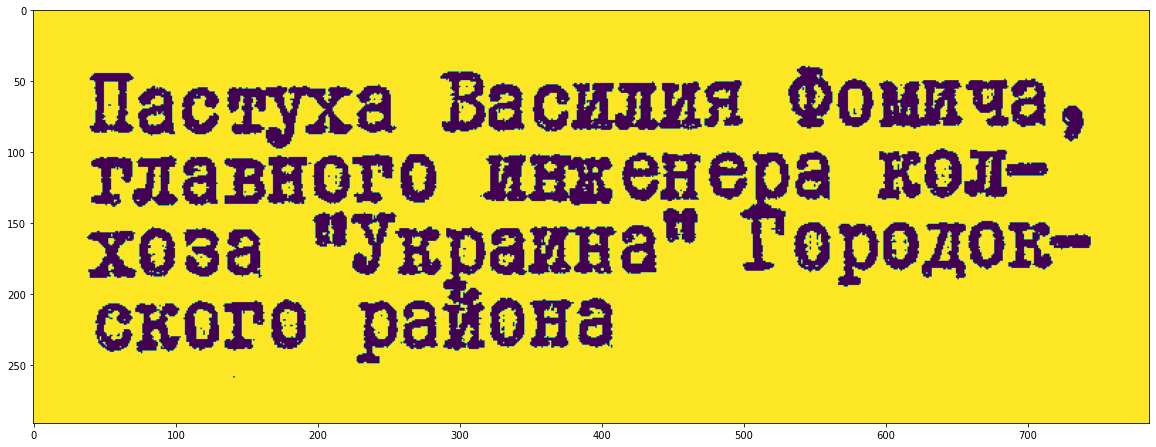

19
Настуха Василия Фомича, тлавкого инкенера кожхоза "7 а* Геродокского ОНа
Настуха | 40 | 45 | 216 | 53
Василия | 287 | 44 | 213 | 43
Фомича, | 532 | 40 | 208 | 53
тлавкого | 41 | 102 | 243 | 37
инкенера | 315 | 100 | 246 | 38
кож- | 595 | 98 | 120 | 36
хоза | 38 | 153 | 123 | 36
"7 | 197 | 142 | 59 | 45
а* | 414 | 140 | 54 | 46
Геродок- | 536 | 149 | 209 | 46
ского | 23 | 192 | 168 | 67
ОНа | 322 | 203 | 86 | 35


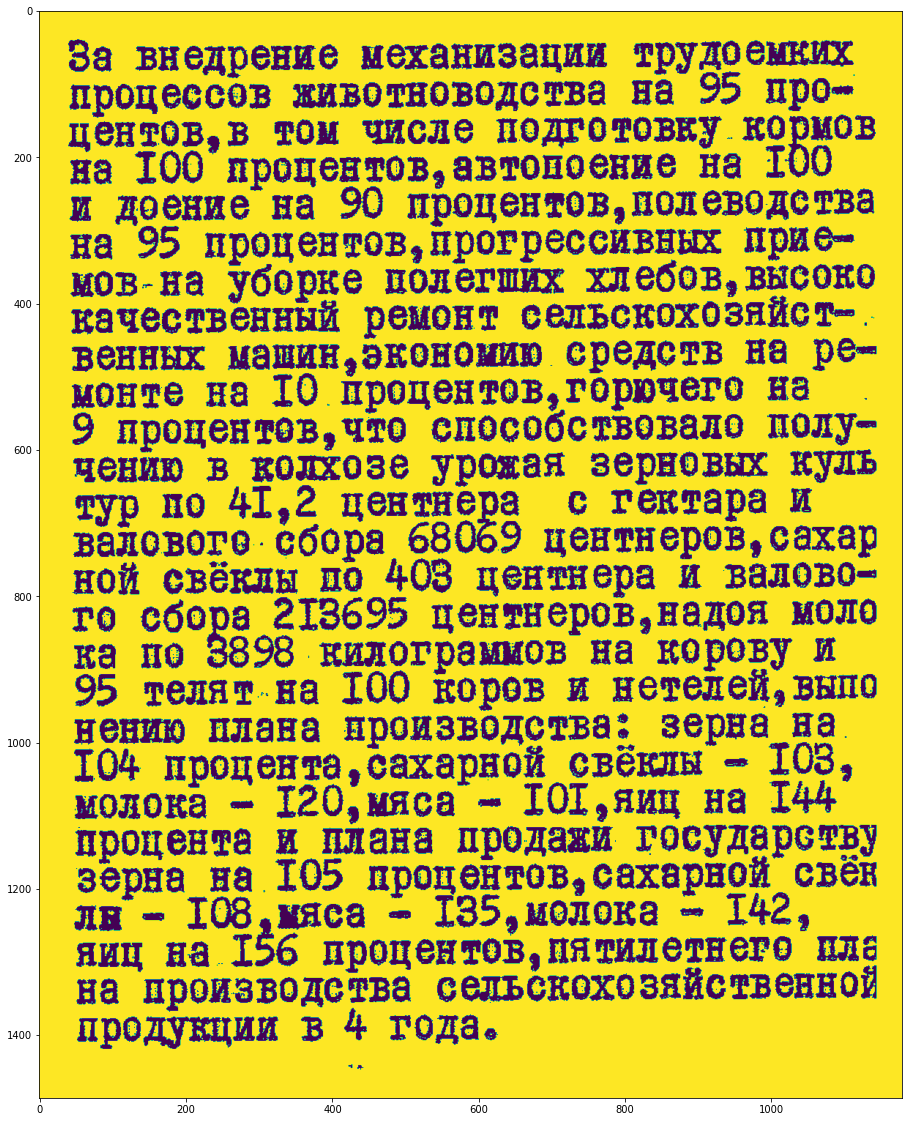

176
Ва внедрение ыеханизации трудоемких процессев хивотноводства на 95 процентов, В тои чиоле подготовку кормов иа 100 процентов, автопоение на 1 и доение на 90 процентев, полеводетва на 95 процентов, протрессивных праемов-на уборке нохегиих хлебов, высоко качественный ремонт сехьскохозяйст-. венинг машин,Экономию средств на рёмонте на 10 пнроцентов,горвчего на — 9 процентев,чтео слособствевало жолучению в колхове урожая зершовых куль тур но &41,2 центне с гёктара и велового сбора 68069 центнеров, сахар ной свёклы но 409 центнера я валового обе&ё 218695 центнеров, надоя моло ка не 3896 кидограмиов на корову к 95 тенят-на 100 коров и нетелей, вЫПо нению плана производстве: зерна_на. 10% проценте,сахарной свёклы 108, ЁЁЁОЕЁ 120,мясе — ТОТ,яиц на 148% цента и нлана продажи государству зорна_ иа 105 п аптов.овхпрноірёвёв хи 108 ,ияса 185,мелока Т4с, НиЦ пв_ШЁБ процеитев, нятялетнего Пле на производства сежьскохозяйственной продужция в & года.
Ва | 40 | 40 | 60 | 44
внедрение | 132 | 47 | 2

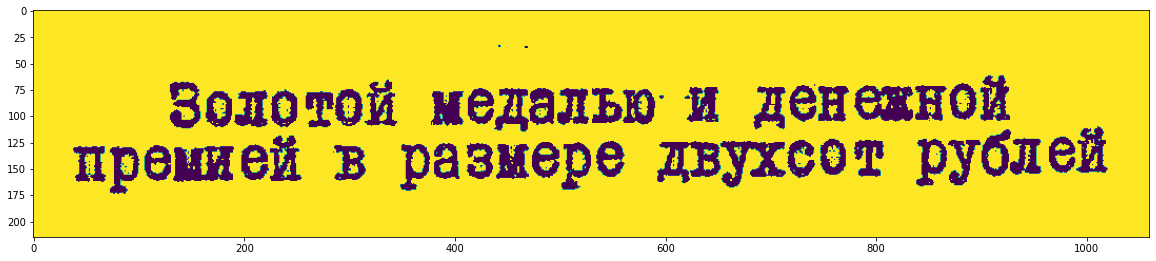

14
Волотой недиыэ и денежной нреииой в разиере двухсет рублей
Волотой | 130 | 62 | 215 | 64
недиыэ | 378 | 74 | 221 | 41
и | 619 | 73 | 32 | 33
денежной | 684 | 62 | 244 | 51
нреииой | 38 | 119 | 217 | 55
в | 285 | 128 | 31 | 34
разиере | 349 | 124 | 213 | 47
двухсет | 593 | 122 | 215 | 46
рублей | 839 | 110 | 182 | 57


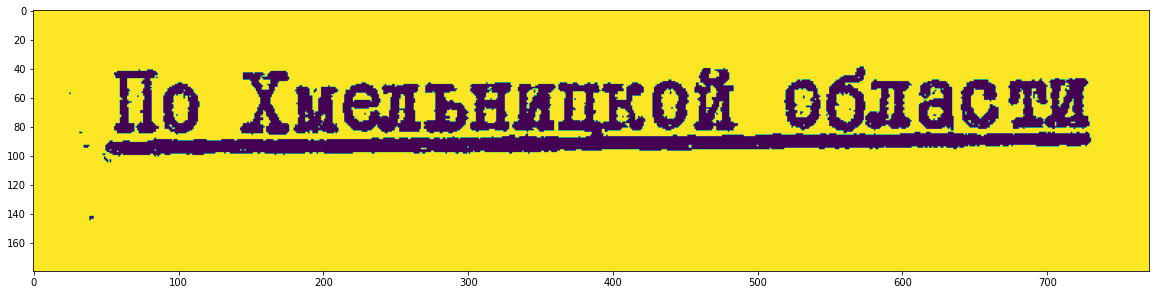

1



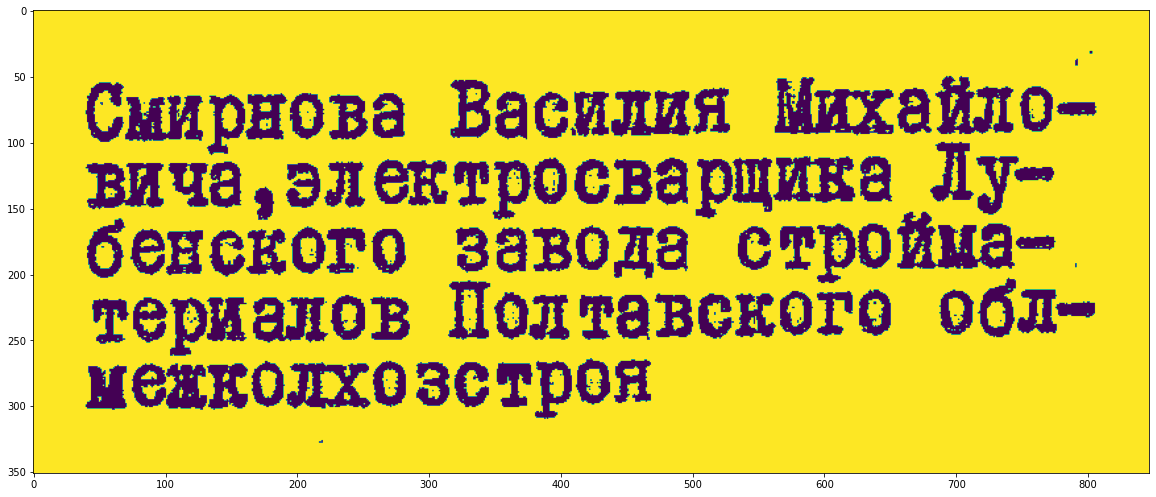

22
Сыирнова Василия Михайлозичв , электросварщика Лубенского зявода отройыатеризлов Похтевского еблиехколхозстроя
Сыирнова | 40 | 55 | 242 | 55
Василия | 317 | 53 | 212 | 45
Михайло- | 563 | 50 | 244 | 45
зичв | 24 | 96 | 135 | 67
, | 168 | 134 | 14 | 25
Лу- | 681 | 100 | 94 | 55
бенского | 41 | 158 | 242 | 45
зявода | 321 | 163 | 176 | 41
отройыа- | 535 | 153 | 257 | 54
теризлов | 45 | 216 | 241 | 46
Похтевского | 315 | 205 | 336 | 45
ебл- | 688 | 203 | 118 | 45
иехколхозстроя | 40 | 264 | 429 | 46


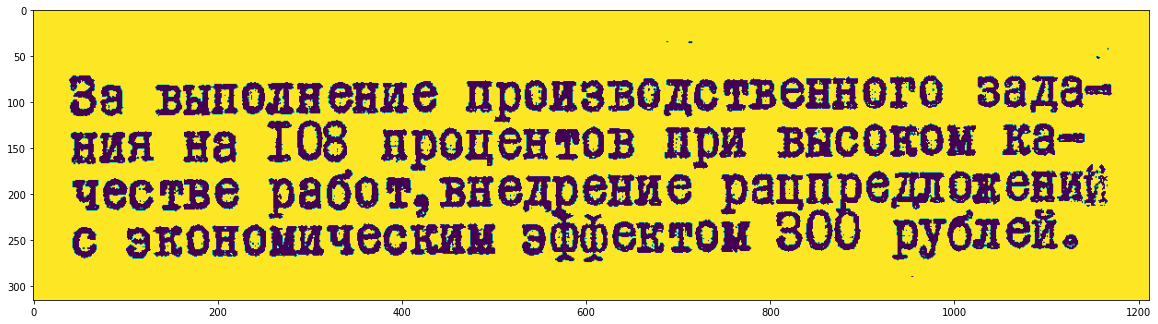

26
Ва выполнение производственного задеНия н8 108 нрецентов ири внсооком Качестве работ, внедрение рЖшшт с экономическим эффектоы рублей.
Ва | 39 | 72 | 59 | 44
выполнение | 133 | 78 | 307 | 38
заде- | 1026 | 72 | 146 | 40
Ния | 41 | 132 | 90 | 36
н8 | 163 | 132 | 58 | 35
108 | 254 | 120 | 87 | 46
нрецентов | 378 | 127 | 275 | 48
ири | 686 | 127 | 89 | 46
внсооком | 808 | 124 | 216 | 38
Ка- | 1053 | 124 | 89 | 35
честве | 43 | 183 | 181 | 36
работ, | 256 | 169 | 174 | 63
внедрение | 441 | 179 | 274 | 35
рЖшшт | 747 | 168 | 420 | 95
с | 43 | 236 | 26 | 34
экономическим | 101 | 232 | 401 | 38
эффектоы | 531 | 228 | 249 | 39
рублей | 933 | 216 | 202 | 56


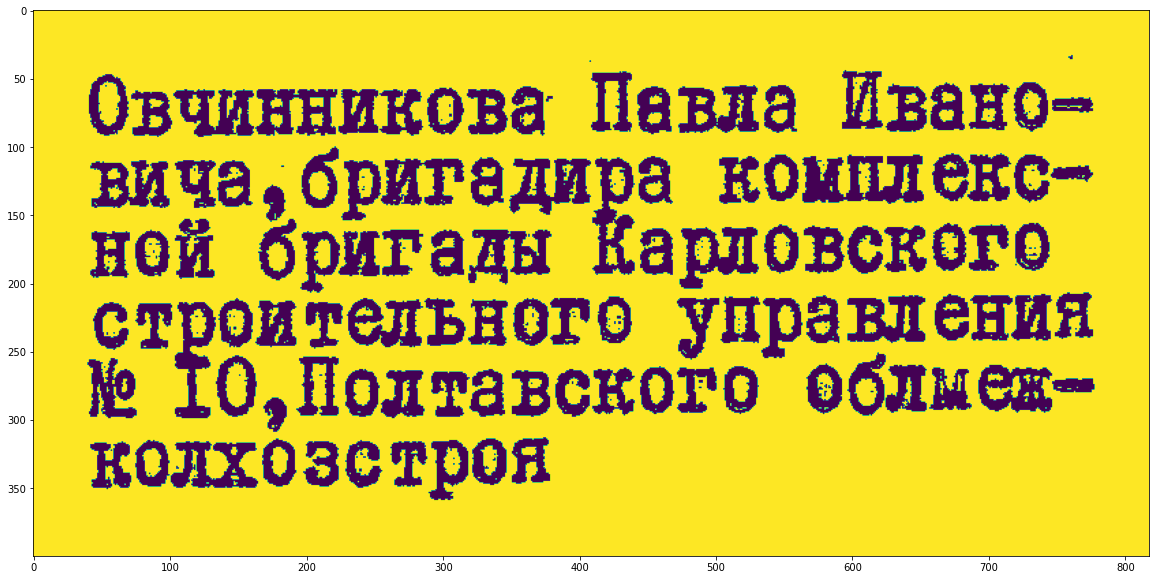

25
Овчинникова Певла Ивановича, брат коиплеконой бригады Карловского с тельного ВЛ еНия !%:Пщ:вшо;? еблибхколхозотроя
Овчинникова | 41 | 47 | 340 | 46
Певла | 409 | 45 | 151 | 46
Ивано- | 593 | 33 | 184 | 56
вича, | 16 | 96 | 169 | 64
брат | 197 | 96 | 124 | 64
коиплеко- | 503 | 105 | 274 | 37
ной | 42 | 153 | 91 | 44
бригады | 165 | 153 | 215 | 54
Карловского | 474 | 156 | 271 | 48
с | 44 | 214 | 26 | 35
тельного | 179 | 198 | 256 | 65
ВЛ | 571 | 194 | 83 | 65
еНия | 658 | 194 | 114 | 65
!%:Пщ:вшо;? | 40 | 209 | 551 | 100
еблибх- | 541 | 247 | 236 | 64
колхозотроя | 42 | 313 | 337 | 46


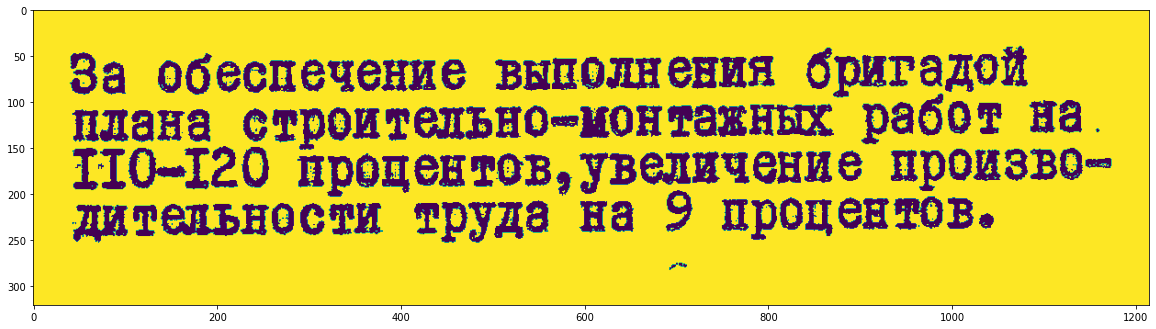

24
Ва обеопечение выпелнешния бригадой плана стреительно-монтехных работ жа. 110-120 процектов, уволичение производительности труда на 9 процентов.
Ва | 40 | 46 | 61 | 46
обеопечение | 136 | 47 | 336 | 45
выпелнешния | 503 | 50 | 305 | 38
бригадой | 842 | 39 | 241 | 56
плана | 43 | 108 | 150 | 36
работ | 902 | 91 | 153 | 55
жа | 1085 | 98 | 76 | 36
110-120 | 43 | 148 | 214 | 48
процектов, | 271 | 142 | 316 | 65
уволичение | 591 | 142 | 312 | 65
произво- | 934 | 150 | 240 | 47
дительности | 43 | 210 | 338 | 43
труда | 415 | 207 | 146 | 46
на | 595 | 208 | 59 | 34
9 | 689 | 196 | 29 | 45
процентов | 750 | 203 | 296 | 47


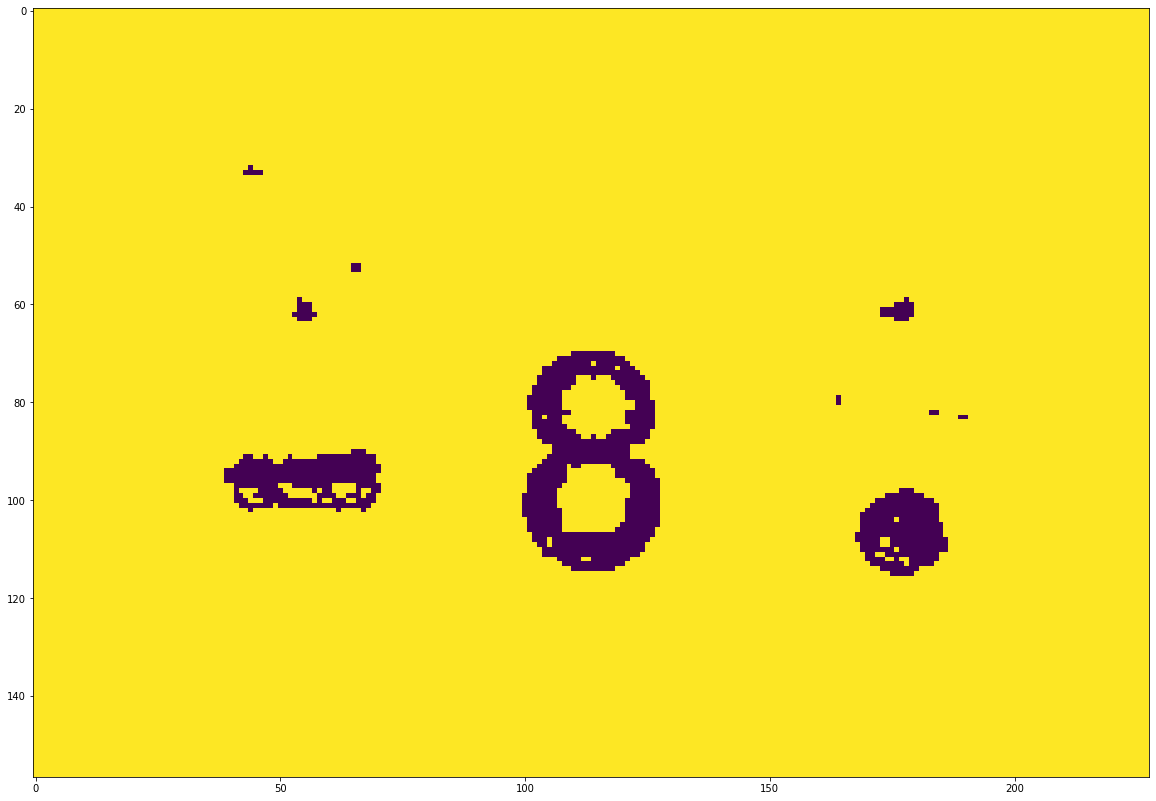

1



In [8]:
ish_img = cv2.imread(name_jpg, 1)
file_text = open('file_text.txt','a')
file_fragment_text = open('file_fragment_text.txt','a')
for coord in list_contur_coord:
    out = copy.copy(ish_img[coord[1]:coord[1]+coord[3]+1, coord[0]:coord[0]+coord[2]+1])
    out = cv2.cvtColor(out, cv2.COLOR_BGR2GRAY)
    ret, out = cv2.threshold(out, 120, 255, 0)
    show_image(out)
    kernel = np.ones((5,5),np.uint8)
    out = cv2.morphologyEx(out, cv2.MORPH_OPEN, kernel)
    def_text(out, file_text, file_fragment_text)
file_fragment_text.write('new_document\n')
file_text.write('new_document\n')
file_text.close()
file_fragment_text.close()